In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import ranksums
from sklearn.feature_selection import mutual_info_regression
import matplotlib.patches as mpatches
import os
from scipy.stats import ranksums
from matplotlib import font_manager
from scipy.optimize import curve_fit

/usr/local/pace-apps/manual/packages/anaconda3/2022.05/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
if not os.path.exists('lstmPlots'):
    os.mkdir('lstmPlots')

In [3]:
if not os.path.exists('lstmPlots/plotData'):
    os.mkdir('lstmPlots/plotData')

In [8]:
font_dirs = ['/storage/home/hcoda1/8/zmobille3/scratch/arial']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# font_manager.get_font_names()

plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=22
plt.rcParams['axes.titlesize']=22
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

In [5]:
fvec=[5,10,15,20,25,30,35,40,45,50]; numFreq=len(fvec)
# fvec=[10,20,30,40,50]; numFreq=len(fvec)
nhvec=[10,100,1000]; numNh=len(nhvec)
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)
numSeeds=25
layer='out'

mis=np.zeros((numFreq,numNh,numDeltas,numSeeds))
r2s=np.zeros((numFreq,numNh,numDeltas,numSeeds))
for fi in range(numFreq):
    f=fvec[fi]
    print(f'f={f}')
    for nhi in range(numNh):
        nh=nhvec[nhi]
        for seed in range(numSeeds):
            for dti in range(numDeltas):
                deltat=deltatvec[dti]
                path=f'LSTMbayesdecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ytest.npy'
                ytest=np.load(path)
                path=f'LSTMbayesdecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ypred_{layer}.npy'
                ypred=np.load(path)
                r2=r2_score(ytest,ypred)
                r2s[fi,nhi,dti,seed]=r2
                yt=ytest.flatten()
                X=np.reshape(yt,(len(yt),1))
                y=ypred.flatten()
                mi=mutual_info_regression(X,y)[0]/np.log(2)
                mis[fi,nhi,dti,seed]=mi*(mi>0)
num_ms = len(ypred)
num_s = num_ms/1000.
np.save(f'lstmPlots/plotData/{layer}_mis.npy',mis)
np.save(f'lstmPlots/plotData/{layer}_r2s.npy',r2s)

f=5
f=10
f=15
f=20
f=25
f=30
f=35
f=40
f=45
f=50


In [5]:
fvec=[5,10,15,20,25,30,35,40,45,50]; numFreq=len(fvec)
# fvec=[10,20,30,40,50]; numFreq=len(fvec)
nhvec=[10,100,1000]; numNh=len(nhvec)
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)
numSeeds=25
layer='out'

npfvec=np.array(fvec)
def fun(variable):
    if (variable in npfvec):
        return np.argwhere(npfvec==variable)[0][0]

subfs=[10,30,50]

sub_fis=[fun(variable) for variable in subfs]

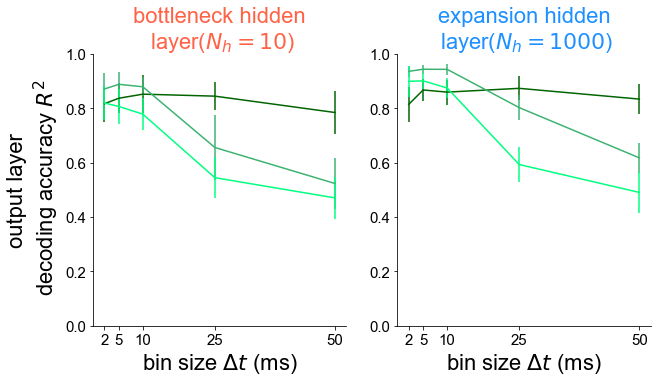

In [9]:
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)
layer='out'

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'lstmPlots/plotData/{layer}_r2s.npy')
# np.save(f'plotData/{layer}_mis_rnnBayes.npy',mis)
# np.save(f'plotData/{layer}_r2s_rnnBayes.npy',r2s)
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))

colors=['darkgreen','mediumseagreen','springgreen']

ci=0 # color index
for sub_fi in sub_fis: # frequency loop
    f=fvec[sub_fi]
    color=colors[ci]
    pi=0 # plot index
    for nhi in [0,2]: # Nh loop
        nh=nhvec[nhi]
        if nh==10:
            nt='bottleneck' # network type
            c='tomato'
        elif nh==1000:
            nt='expansion'
            c='dodgerblue'
        sub_stuff=stuff[sub_fi,nhi,:,:]
        means=sub_stuff.mean(axis=1)
        sds=sub_stuff.std(axis=1)
        ax[pi].set_title(f'{nt} hidden\n layer($N_h={nh}$)',color=c)
        ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
        ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[pi].set_ylim([0,1])
        ax[pi].set_xticks([2,5,10,25,50])
#         ax[pi].legend(fontsize=14)
        pi+=1
    ci+=1
ax[0].set_ylabel('output layer\n decoding accuracy $R^2$')
sns.despine()

plt.savefig(f'lstmPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_noLeg.svg',bbox_inches='tight')
plt.savefig(f'lstmPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_noLeg.png',bbox_inches='tight')
plt.show()

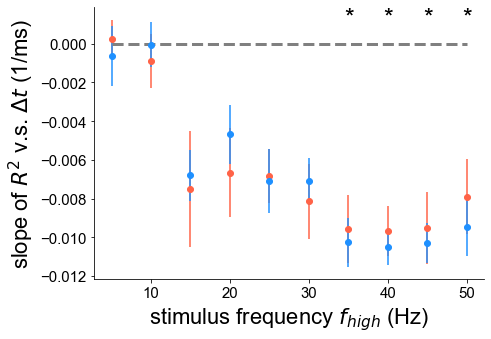

In [10]:
colors=['tomato','dodgerblue']
# stuff=np.load(f'plotData/{layer}_mis_rnn_slide.npy')
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
# stuff=np.load(f'plotData/{layer}_mis_rnnBayes.npy')
layer='out'
stuff=np.load(f'lstmPlots/plotData/{layer}_r2s.npy')


# sd_stuff_v_dt=np.zeros((numSeeds,numDeltas))

fig,ax=plt.subplots(figsize=(7,5))

subnumNh=2  #only plotting nh=10 and nh=1000

for fi in range(numFreq):
    f=fvec[fi]
    slopes=np.zeros((subnumNh,numSeeds))
    sub_nhi=0
    for nhi in [0,2]: # only want nh=10 and nh=1000
        nh=nhvec[nhi]
        color=colors[sub_nhi]
        all_stuff_v_dt=np.zeros((numSeeds,numDeltas))
        for seed in range(numSeeds):
            stuff_v_dt=stuff[fi,nhi,:,seed]
            all_stuff_v_dt[seed,:]=stuff_v_dt
#             plt.plot(stuff_v_dt,linewidth=0.5)
            slope,_=np.polyfit(deltatvec,stuff_v_dt,1)
            slopes[sub_nhi,seed]=slope
#         plt.ylim()
#         plt.show()
#         plt.close()
#         mean_stuff_v_dt=all_stuff_v_dt.mean(axis=0)
#         sd_stuff_v_dt=all_stuff_v_dt.std(axis=0)
#         plt.errorbar(deltatvec,mean_stuff_v_dt,sd_stuff_v_dt)
#         plt.show()
#         plt.close()
        means=np.mean(slopes[sub_nhi,:])
        sds=np.std(slopes[sub_nhi,:])
        ax.errorbar(f,means,sds,color=color,marker='o')
#         plt.show()
#         plt.close()
        sub_nhi+=1
    nh10_slopes=slopes[0,:]
    nh1k_slopes=slopes[1,:]
    stat,pval = ranksums(nh10_slopes,nh1k_slopes,'greater')
#     stat,pval = ranksums(nh10_slopes,nh1k_slopes)
    if pval < 0.05:
        ax.text(f-0.55,0.001,'*',fontsize=25)
ax.set_ylabel('slope of $R^2$ v.s. $\Delta t$ (1/ms)')
ax.set_xlabel('stimulus frequency $f_{high}$ (Hz)')
# ax.set_ylim(-0.02,0.02)
ax.plot(fvec,np.zeros(numFreq),linestyle='--',color='gray',linewidth=3)
sns.despine()

plt.savefig(f'lstmPlots/r2{layer}Slope_v_freq_2Nhs.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/r2{layer}Slope_v_freq_2Nhs.png',bbox_inches='tight',dpi=200)
plt.show()

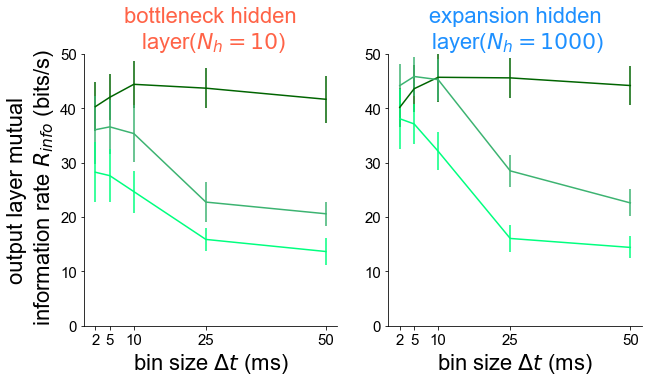

In [11]:
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)
layer='out'

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'lstmPlots/plotData/{layer}_mis.npy')
# np.save(f'plotData/{layer}_mis_rnnBayes.npy',mis)
# np.save(f'plotData/{layer}_r2s_rnnBayes.npy',r2s)
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))

colors=['darkgreen','mediumseagreen','springgreen']

num_s = 0.05 # divide info by 50 ms time window to get info rate

ci=0 # color index
for sub_fi in sub_fis: # frequency loop
    f=fvec[sub_fi]
    color=colors[ci]
    pi=0 # plot index
    for nhi in [0,2]: # Nh loop
        nh=nhvec[nhi]
        if nh==10:
            nt='bottleneck' # network type
            c='tomato'
        elif nh==1000:
            nt='expansion'
            c='dodgerblue'
        sub_stuff=stuff[sub_fi,nhi,:,:]/num_s
        means=sub_stuff.mean(axis=1)
        sds=sub_stuff.std(axis=1)
        ax[pi].set_title(f'{nt} hidden\n layer($N_h={nh}$)',color=c)
        ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
        ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[pi].set_ylim([0,50])
        ax[pi].set_xticks([2,5,10,25,50])
#         ax[pi].legend(fontsize=14)
        pi+=1
    ci+=1
ax[0].set_ylabel('output layer mutual\n information rate $R_{info}$ (bits/s)')
sns.despine()

plt.savefig(f'lstmPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_noLeg.svg',bbox_inches='tight')
plt.savefig(f'lstmPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_noLeg.png',bbox_inches='tight')
plt.show()

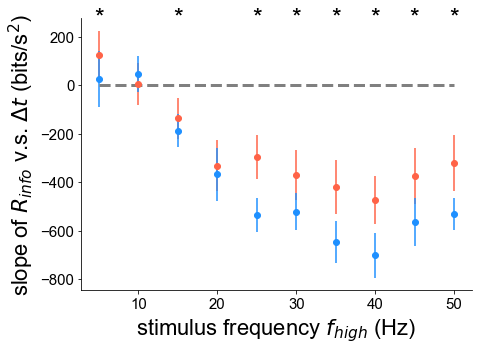

In [12]:
colors=['tomato','dodgerblue']
# stuff=np.load(f'plotData/{layer}_mis_rnn_slide.npy')
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
# stuff=np.load(f'plotData/{layer}_mis_rnnBayes.npy')
layer='out'
stuff=np.load(f'lstmPlots/plotData/{layer}_mis.npy')

fig,ax=plt.subplots(figsize=(7,5))

num_s = 0.05 # divide info by T=50 ms time window to get info rate

subnumNh=2  #only plotting nh=10 and nh=1000

for fi in range(numFreq):
    f=fvec[fi]
    slopes=np.zeros((subnumNh,numSeeds))
    sub_nhi=0
    for nhi in [0,2]: # only want nh=10 and nh=1000
        nh=nhvec[nhi]
        color=colors[sub_nhi]
        all_stuff_v_dt=np.zeros((numSeeds,numDeltas))
        for seed in range(numSeeds):
            stuff_v_dt=stuff[fi,nhi,:,seed]/num_s
            all_stuff_v_dt[seed,:]=stuff_v_dt
            deltatvec_secs = [(x/1000) for x in deltatvec] # convert to seconds to get units in bits/s^2
            slope,_=np.polyfit(deltatvec_secs,stuff_v_dt,1)
            slopes[sub_nhi,seed]=slope

        means=np.mean(slopes[sub_nhi,:])
        sds=np.std(slopes[sub_nhi,:])
        ax.errorbar(f,means,sds,color=color,marker='o')
#         plt.show()
#         plt.close()
        sub_nhi+=1
    nh10_slopes=slopes[0,:]
    nh1k_slopes=slopes[1,:]
    stat,pval = ranksums(nh10_slopes,nh1k_slopes,'greater')
#     stat,pval = ranksums(nh10_slopes,nh1k_slopes)
    if pval < 0.05:
        ax.text(f-0.63,250,'*',fontsize=25)
ax.set_ylabel('slope of $R_{info}$ v.s. $\Delta t$ (bits/s$^2$)')
ax.set_xlabel('stimulus frequency $f_{high}$ (Hz)')
# ax.set_ylim(-0.02,0.02)
ax.plot(fvec,np.zeros(numFreq),linestyle='--',color='gray',linewidth=3)
sns.despine()

plt.savefig(f'lstmPlots/mi{layer}Slope_v_freq_2Nhs.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/mi{layer}Slope_v_freq_2Nhs.png',bbox_inches='tight',dpi=200)
plt.show()

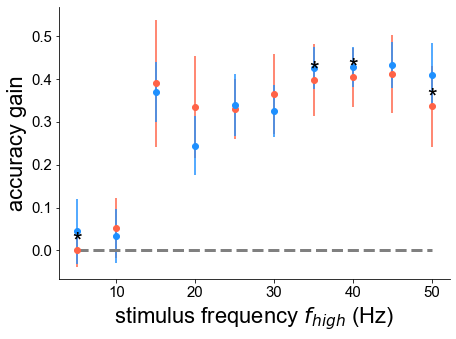

In [31]:
colors=['tomato','dodgerblue']
# stuff=np.load(f'plotData/{layer}_mis_rnn_slide.npy')
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
# stuff=np.load(f'plotData/{layer}_mis_rnnBayes.npy')
layer='out'
stuff=np.load(f'lstmPlots/plotData/{layer}_r2s.npy')

fig,ax=plt.subplots(figsize=(7,5))

subnumNh=2  #only plotting nh=10 and nh=1000

for fi in range(numFreq):
    f=fvec[fi]
    gains=np.zeros((subnumNh,numSeeds))
    sub_nhi=0
    for nhi in [0,2]: # only want nh=10 and nh=1000
        nh=nhvec[nhi]
        color=colors[sub_nhi]
        all_stuff_v_dt=np.zeros((numSeeds,numDeltas))
        for seed in range(numSeeds):
            stuff_v_dt=stuff[fi,nhi,:,seed]
            all_stuff_v_dt[seed,:]=stuff_v_dt
            gain = stuff_v_dt[1] - stuff_v_dt[-1] # R2 at deltat=5 minus R2 at deltat=50
#             slope,_=np.polyfit(deltatvec,stuff_v_dt,1)
            gains[sub_nhi,seed]=gain

        means=np.mean(gains[sub_nhi,:])
        sds=np.std(gains[sub_nhi,:])
        ax.errorbar(f,means,sds,color=color,marker='o')
#         plt.show()
#         plt.close()
        sub_nhi+=1
    nh10_gains=gains[0,:]
    nh1k_gains=gains[1,:]
#     stat,pval = ranksums(nh10_slopes,nh1k_slopes,'greater')
    stat,pval = ranksums(nh10_gains,nh1k_gains,'less')
    if pval < 0.05:
        ax.text(f-0.55,np.mean(gains[0,:])+0.0025,'*',fontsize=25)
ax.set_ylabel('accuracy gain')
ax.set_xlabel('stimulus frequency $f_{high}$ (Hz)')
# ax.set_ylim(-0.02,0.02)
ax.plot(fvec,np.zeros(numFreq),linestyle='--',color='gray',linewidth=3)
sns.despine()

plt.savefig(f'lstmPlots/r2{layer}Gain_v_freq_2Nhs.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/r2{layer}Gain_v_freq_2Nhs.png',bbox_inches='tight',dpi=200)
plt.show()

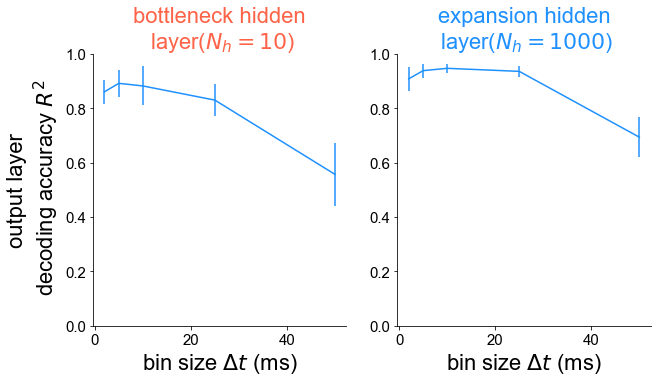

In [28]:
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)
layer='out'

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'lstmPlots/plotData/{layer}_r2s.npy')

fvec_np = np.array(fvec)
fi = np.where(fvec_np==20)[0][0] # what's happening at 20 Hz?
# print(fi)
# print(fvec[fi])

pi=0 # plot index
for nhi in [0,2]: # Nh loop
    nh=nhvec[nhi]
    if nh==10:
        nt='bottleneck' # network type
        c='tomato'
    elif nh==1000:
        nt='expansion'
        c='dodgerblue'
    sub_stuff=stuff[fi,nhi,:,:]
    means=sub_stuff.mean(axis=1)
    sds=sub_stuff.std(axis=1)
    ax[pi].set_title(f'{nt} hidden\n layer($N_h={nh}$)',color=c)
    ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
    ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
    ax[pi].set_ylim([0,1])
    pi+=1
    
ax[0].set_ylabel('output layer\n decoding accuracy $R^2$')
sns.despine()

# plt.savefig(f'lstmPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_noLeg.svg',bbox_inches='tight')
# plt.savefig(f'lstmPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_noLeg.png',bbox_inches='tight')
plt.show()

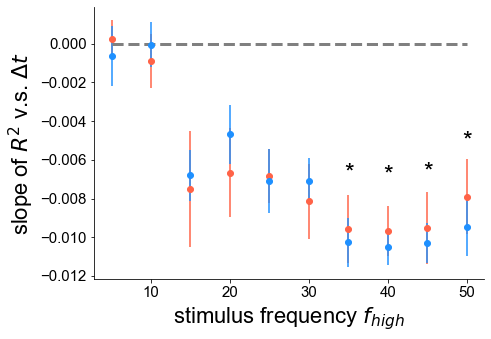

In [24]:
colors=['tomato','dodgerblue']
# stuff=np.load(f'plotData/{layer}_mis_rnn_slide.npy')
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
# stuff=np.load(f'plotData/{layer}_mis_rnnBayes.npy')
stuff=np.load(f'lstmPlots/plotData/{layer}_r2s.npy')


# sd_stuff_v_dt=np.zeros((numSeeds,numDeltas))

fig,ax=plt.subplots(figsize=(7,5))

subnumNh=2  #only plotting nh=10 and nh=1000

for fi in range(numFreq):
    f=fvec[fi]
    slopes=np.zeros((subnumNh,numSeeds))
    sub_nhi=0
    for nhi in [0,2]: # only want nh=10 and nh=1000
        nh=nhvec[nhi]
        color=colors[sub_nhi]
        all_stuff_v_dt=np.zeros((numSeeds,numDeltas))
        for seed in range(numSeeds):
            stuff_v_dt=stuff[fi,nhi,:,seed]
            all_stuff_v_dt[seed,:]=stuff_v_dt
            slope,_=np.polyfit(deltatvec,stuff_v_dt,1)
            slopes[sub_nhi,seed]=slope
#         mean_stuff_v_dt=all_stuff_v_dt.mean(axis=0)
#         sd_stuff_v_dt=all_stuff_v_dt.std(axis=0)
#         plt.errorbar(deltatvec,mean_stuff_v_dt,sd_stuff_v_dt)
#         plt.show()
#         plt.close()
        means=np.mean(slopes[sub_nhi,:])
        sds=np.std(slopes[sub_nhi,:])
        ax.errorbar(f,means,sds,color=color,marker='o')
#         plt.show()
#         plt.close()
        sub_nhi+=1
    nh10_slopes=slopes[0,:]
    nh1k_slopes=slopes[1,:]
    stat,pval = ranksums(nh10_slopes,nh1k_slopes,'greater')
    if pval < 0.05:
        ax.text(f-0.55,np.mean(slopes[0,:])+0.0025,'*',fontsize=25)
ax.set_ylabel('slope of $R^2$ v.s. $\Delta t$')
ax.set_xlabel('stimulus frequency $f_{high}$')
# ax.set_ylim(-0.02,0.02)
ax.plot(fvec,np.zeros(numFreq),linestyle='--',color='gray',linewidth=3)
sns.despine()

plt.savefig(f'lstmPlots/r2{layer}Slope_v_freq_2Nhs.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/r2{layer}Slope_v_freq_2Nhs.png',bbox_inches='tight',dpi=200)
plt.show()

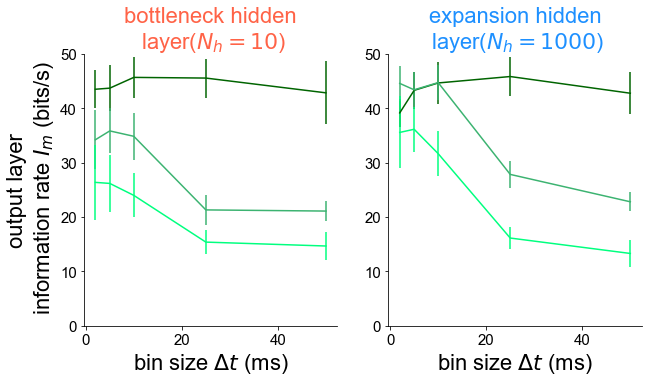

In [36]:
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'plotData/{layer}_mis_lstmBayes.npy')
# np.save(f'plotData/{layer}_mis_rnnBayes.npy',mis)
# np.save(f'plotData/{layer}_r2s_rnnBayes.npy',r2s)
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))

num_s = 0.05 # 50 ms window

colors=['darkgreen','mediumseagreen','springgreen']

ci=0 # color index
for sub_fi in sub_fis: # frequency loop
    f=fvec[sub_fi]
    color=colors[ci]
    pi=0 # plot index
    for nhi in [0,2]: # Nh loop
        nh=nhvec[nhi]
        if nh==10:
            nt='bottleneck' # network type
            c='tomato'
        elif nh==1000:
            nt='expansion'
            c='dodgerblue'
        sub_stuff=stuff[sub_fi,nhi,:,:]/num_s # divide by no. seconds to info rate
        means=sub_stuff.mean(axis=1)
        sds=sub_stuff.std(axis=1)
        ax[pi].set_title(f'{nt} hidden\n layer($N_h={nh}$)',color=c)
        ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
        ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[pi].set_ylim([0,50])
#         ax[pi].legend(fontsize=14)
        pi+=1
    ci+=1
ax[0].set_ylabel('output layer\n information rate $I_m$ (bits/s)')
sns.despine()

plt.savefig(f'lstmPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_LSTMbayes_noLeg.svg',bbox_inches='tight')
plt.savefig(f'lstmPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_LSTMbayes_noLeg.png',bbox_inches='tight')
plt.show()

ValueError: 'x' and 'y' must have the same size

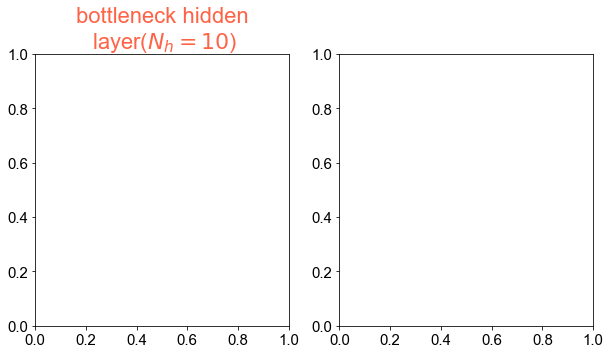

In [40]:
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'plotData/{layer}_mis.npy')
# np.save(f'plotData/{layer}_mis_rnnBayes.npy',mis)
# np.save(f'plotData/{layer}_r2s_rnnBayes.npy',r2s)
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))

num_s = 0.05 # 50 ms window

colors=['darkgreen','mediumseagreen','springgreen']

ci=0 # color index
for sub_fi in sub_fis: # frequency loop
    f=fvec[sub_fi]
    color=colors[ci]
    pi=0 # plot index
    for nhi in [0,2]: # Nh loop
        nh=nhvec[nhi]
        if nh==10:
            nt='bottleneck' # network type
            c='tomato'
        elif nh==1000:
            nt='expansion'
            c='dodgerblue'
        sub_stuff=stuff[sub_fi,nhi,:,:]/num_s # divide by no. seconds to info rate
        means=sub_stuff.mean(axis=1)
        sds=sub_stuff.std(axis=1)
        ax[pi].set_title(f'{nt} hidden\n layer($N_h={nh}$)',color=c)
        ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
        ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[pi].set_ylim([0,50])
#         ax[pi].legend(fontsize=14)
        pi+=1
    ci+=1
ax[0].set_ylabel('output layer\n information rate $I_m$ (bits/s)')
sns.despine()

plt.savefig(f'lstmPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_LSTMbayes_noLeg.svg',bbox_inches='tight')
plt.savefig(f'lstmPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_LSTMbayes_noLeg.png',bbox_inches='tight')
plt.show()

TypeError: expected x and y to have same length

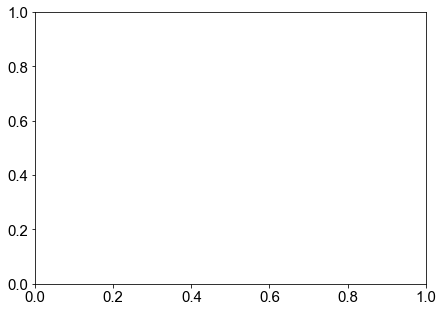

In [38]:
fvec=[5,10,15,20,25,30,35,40,45,50]; numFreq=len(fvec)
nhvec=[10,100,1000]; numNh=len(nhvec)
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)
numSeeds=25
colors=['tomato','dodgerblue']
layer='out'
# stuff=np.load(f'plotData/{layer}_mis_rnn_slide.npy')
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
stuff=np.load(f'plotData/{layer}_mis.npy')

num_s = 0.05 # 50 ms duration

fig,ax=plt.subplots(figsize=(7,5))

subnumNh=2  #only plotting nh=10 and nh=1000

for fi in range(numFreq):
    f=fvec[fi]
    slopes=np.zeros((subnumNh,numSeeds))
    sub_nhi=0
    for nhi in [0,2]: # only want nh=10 and nh=1000
        nh=nhvec[nhi]
        color=colors[sub_nhi]
        for seed in range(numSeeds):
            stuff_v_dt=stuff[fi,nhi,:,seed]/num_s
            deltatvec_secs = [(dt/1000) for dt in deltatvec]
            slope,_=np.polyfit(deltatvec_secs,stuff_v_dt,1)
            slopes[sub_nhi,seed]=slope
        means=np.mean(slopes[sub_nhi,:])
        sds=np.std(slopes[sub_nhi,:])
        plt.errorbar(f,means,sds,color=color,marker='o')
        sub_nhi+=1
    nh10_slopes=slopes[0,:]
    nh1k_slopes=slopes[1,:]
    stat,pval = ranksums(nh10_slopes,nh1k_slopes,'greater')
    if pval < 0.05:
        ax.text(f-0.65,np.mean(slopes[0,:])+20,'*',fontsize=25)
ax.set_ylabel('slope of $I_m$ v.s. $\Delta t$ (bits/s$^2$)')
ax.set_xlabel('stimulus frequency $f_{high}$ (Hz)')
# ax.set_ylim(-0.02,0.02)
ax.plot(fvec,np.zeros(numFreq),linestyle='--',color='gray',linewidth=3)
sns.despine()

plt.savefig(f'lstmPlots/mi{layer}Slope_v_freq_2Nhs_LSTMbayes.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/mi{layer}Slope_v_freq_2Nhs_LSTMbayes.png',bbox_inches='tight',dpi=200)
plt.show()

In [39]:
stuff_v_dt

array([28.15948683, 39.52718781, 44.40915801, 43.59066837, 41.93891533,
       41.30927447, 43.35454969, 43.88824462, 45.1221996 , 50.28988162])

In [22]:
fvec=[5,10,15,20,25,30,35,40,45,50]; numFreq=len(fvec)
# fvec=[10,20,30,40,50]; numFreq=len(fvec)
nhvec=[10,100,1000]; numNh=len(nhvec)
deltatvec=[2,5,10,15,20,25,30,35,40,45,50]; numDeltas=len(deltatvec)
numSeeds=10
layer='out'

stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
for fi in range(numFreq):
    f=fvec[fi]
    print(f'f={f}')
    for nhi in range(numNh):
        nh=nhvec[nhi]
        for seed in range(numSeeds):
            for dti in range(numDeltas):
                deltat=deltatvec[dti]
                path=f'strongDecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ytest.npy'
                ytest=np.load(path)
                path=f'strongDecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ypred_{layer}.npy'
                ypred=np.load(path)
                yt=ytest.flatten()
                X=np.reshape(yt,(len(yt),1))
                y=ypred.flatten()
                mi=mutual_info_regression(X,y)[0]/np.log(2)
                stuff[fi,nhi,dti,seed]=mi*(mi>0)
np.save(f'plotData/{layer}_mis_strong.npy',stuff)

f=5
f=10
f=15
f=20
f=25
f=30
f=35
f=40
f=45
f=50


In [23]:
npfvec=np.array(fvec)
def fun(variable):
    if (variable in npfvec):
        return np.argwhere(npfvec==variable)[0][0]

subfs=[10,30,50]

sub_fis=[fun(variable) for variable in subfs]

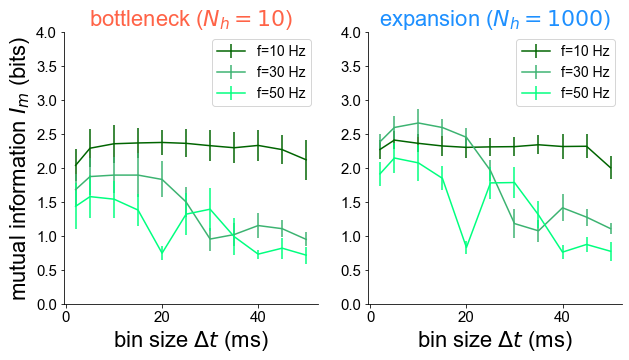

In [24]:
deltatvec=[2,5,10,15,20,25,30,35,40,45,50]; numDeltas=len(deltatvec)

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'plotData/{layer}_mis_strong.npy')
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))

colors=['darkgreen','mediumseagreen','springgreen']

ci=0 # color index
for sub_fi in sub_fis: # frequency loop
    f=fvec[sub_fi]
    color=colors[ci]
    pi=0 # plot index
    for nhi in [0,2]: # Nh loop
        nh=nhvec[nhi]
        if nh==10:
            nt='bottleneck' # network type
            c='tomato'
        elif nh==1000:
            nt='expansion'
            c='dodgerblue'
        sub_stuff=stuff[sub_fi,nhi,:,:]
        means=sub_stuff.mean(axis=1)
        sds=sub_stuff.std(axis=1)
        ax[pi].set_title(f'{nt} ($N_h={nh}$)',color=c)
        ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
        ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[pi].set_ylim([0,4])
        ax[pi].legend(fontsize=14)
        pi+=1
    ci+=1
ax[0].set_ylabel('mutual information $I_m$ (bits)')
sns.despine()

plt.savefig(f'cleanPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_strong.svg',bbox_inches='tight')
plt.savefig(f'cleanPlots/mi_v_deltat_{layer}_3Freqs_2Nhs_strong.png',bbox_inches='tight')
plt.show()

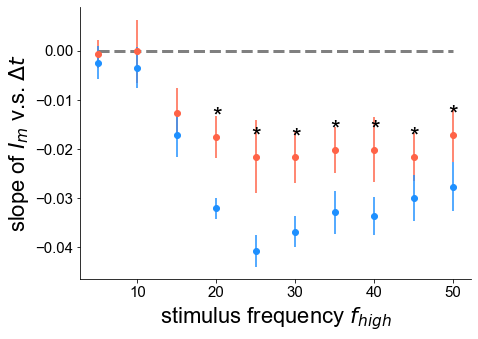

In [25]:
colors=['tomato','dodgerblue']
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))

fig,ax=plt.subplots(figsize=(7,5))

subnumNh=2  #only plotting nh=10 and nh=1000

for fi in range(numFreq):
    f=fvec[fi]
    slopes=np.zeros((subnumNh,numSeeds))
    sub_nhi=0
    for nhi in [0,2]: # only want nh=10 and nh=1000
        nh=nhvec[nhi]
        color=colors[sub_nhi]
        for seed in range(numSeeds):
            stuff_v_dt=stuff[fi,nhi,:,seed]
            slope,_=np.polyfit(deltatvec,stuff_v_dt,1)
            slopes[sub_nhi,seed]=slope
        means=np.mean(slopes[sub_nhi,:])
        sds=np.std(slopes[sub_nhi,:])
        plt.errorbar(f,means,sds,color=color,marker='o')
        sub_nhi+=1
    nh10_slopes=slopes[0,:]
    nh1k_slopes=slopes[1,:]
    stat,pval = ranksums(nh10_slopes,nh1k_slopes,'greater')
    if pval < 0.05:
        ax.text(f-0.55,np.mean(slopes[0,:])+0.0025,'*',fontsize=25)
ax.set_ylabel('slope of $I_m$ v.s. $\Delta t$')
ax.set_xlabel('stimulus frequency $f_{high}$')
# ax.set_ylim(-0.02,0.02)
ax.plot(fvec,np.zeros(numFreq),linestyle='--',color='gray',linewidth=3)
sns.despine()

plt.savefig(f'cleanPlots/mi{layer}Slope_v_freq_2Nhs_strong.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'cleanPlots/mi{layer}Slope_v_freq_2Nhs_strong.png',bbox_inches='tight',dpi=200)
plt.show()

In [11]:
fvec=[5,10,15,20,25,30,35,40,45,50]; numFreq=len(fvec)
nhvec=[10,100,1000]; numNh=len(nhvec)
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)
numSeeds=10
layer='out'

stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
for fi in range(numFreq):
    f=fvec[fi]
    print(f'f={f}')
    for nhi in range(numNh):
        nh=nhvec[nhi]
        for seed in range(numSeeds):
            for dti in range(numDeltas):
                deltat=deltatvec[dti]
                path=f'rnnDecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ytest.npy'
                ytest=np.load(path)
                path=f'rnnDecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ypred_{layer}.npy'
                ypred=np.load(path)
                r2=r2_score(ytest,ypred)
                stuff[fi,nhi,dti,seed]=r2
np.save(f'plotData/{layer}_r2s_rnn.npy',stuff)

f=5
f=10
f=15
f=20
f=25
f=30
f=35
f=40
f=45
f=50


In [26]:
fvec=[5,10,15,20,25,30,35,40,45,50]; numFreq=len(fvec)
nhvec=[10,100,1000]; numNh=len(nhvec)
deltatvec=[2,5,10,15,20,25,30,35,40,45,50]; numDeltas=len(deltatvec)
numSeeds=10
layer='out'

stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))
for fi in range(numFreq):
    f=fvec[fi]
    print(f'f={f}')
    for nhi in range(numNh):
        nh=nhvec[nhi]
        for seed in range(numSeeds):
            for dti in range(numDeltas):
                deltat=deltatvec[dti]
                path=f'strongDecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ytest.npy'
                ytest=np.load(path)
                path=f'strongDecodeData/f{f}/Nh{nh}/seed{seed}/deltat{deltat}/ypred_{layer}.npy'
                ypred=np.load(path)
                r2=r2_score(ytest,ypred)
                stuff[fi,nhi,dti,seed]=r2
np.save(f'plotData/{layer}_r2s_strong.npy',stuff)

f=5
f=10
f=15
f=20
f=25
f=30
f=35
f=40
f=45
f=50


In [12]:
npfvec=np.array(fvec)
def fun(variable):
    if (variable in npfvec):
        return np.argwhere(npfvec==variable)[0][0]

subfs=[10,30,50]

sub_fis=[fun(variable) for variable in subfs]

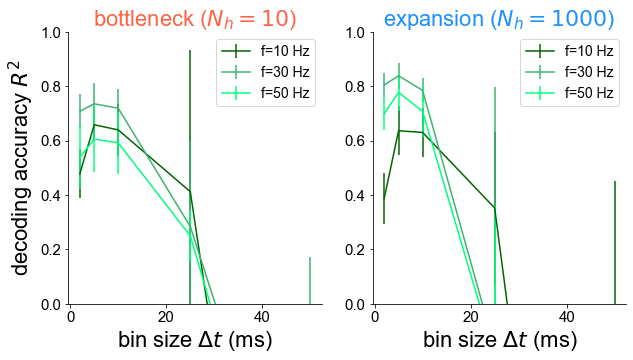

In [13]:
deltatvec=[2,5,10,25,50]; numDeltas=len(deltatvec)

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'plotData/{layer}_r2s_rnn.npy')

colors=['darkgreen','mediumseagreen','springgreen']

ci=0 # color index
for sub_fi in sub_fis: # frequency loop
    f=fvec[sub_fi]
    color=colors[ci]
    pi=0 # plot index
    for nhi in [0,2]: # Nh loop
        nh=nhvec[nhi]
        if nh==10:
            nt='bottleneck' # network type
            c='tomato'
        elif nh==1000:
            nt='expansion'
            c='dodgerblue'
        sub_stuff=stuff[sub_fi,nhi,:,:]
        means=sub_stuff.mean(axis=1)
        sds=sub_stuff.std(axis=1)
        ax[pi].set_title(f'{nt} ($N_h={nh}$)',color=c)
        ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
        ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[pi].set_ylim([0,1])
        ax[pi].legend(fontsize=14)
        pi+=1
    ci+=1
ax[0].set_ylabel('decoding accuracy $R^2$')
sns.despine()

# plt.savefig(f'cleanPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_strong.svg',bbox_inches='tight')
# plt.savefig(f'cleanPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_strong.png',bbox_inches='tight')
plt.show()

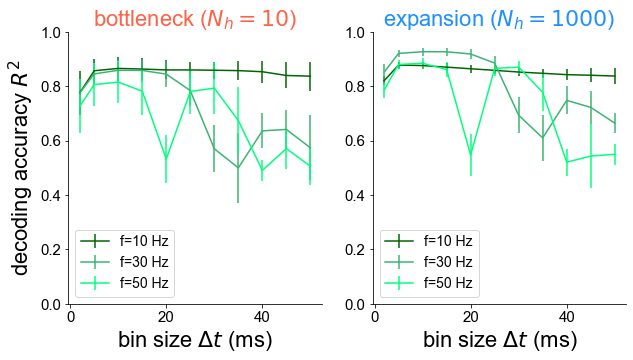

In [28]:
deltatvec=[2,5,10,15,20,25,30,35,40,45,50]; numDeltas=len(deltatvec)

fig,ax=plt.subplots(1,2,figsize=(10,5))

stuff=np.load(f'plotData/{layer}_r2s_strong.npy')

colors=['darkgreen','mediumseagreen','springgreen']

ci=0 # color index
for sub_fi in sub_fis: # frequency loop
    f=fvec[sub_fi]
    color=colors[ci]
    pi=0 # plot index
    for nhi in [0,2]: # Nh loop
        nh=nhvec[nhi]
        if nh==10:
            nt='bottleneck' # network type
            c='tomato'
        elif nh==1000:
            nt='expansion'
            c='dodgerblue'
        sub_stuff=stuff[sub_fi,nhi,:,:]
        means=sub_stuff.mean(axis=1)
        sds=sub_stuff.std(axis=1)
        ax[pi].set_title(f'{nt} ($N_h={nh}$)',color=c)
        ax[pi].errorbar(deltatvec,means,sds,color=color,label=f'f={f} Hz')
        ax[pi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[pi].set_ylim([0,1])
        ax[pi].legend(fontsize=14)
        pi+=1
    ci+=1
ax[0].set_ylabel('decoding accuracy $R^2$')
sns.despine()

plt.savefig(f'cleanPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_strong.svg',bbox_inches='tight')
plt.savefig(f'cleanPlots/r2_v_deltat_{layer}_3Freqs_2Nhs_strong.png',bbox_inches='tight')
plt.show()

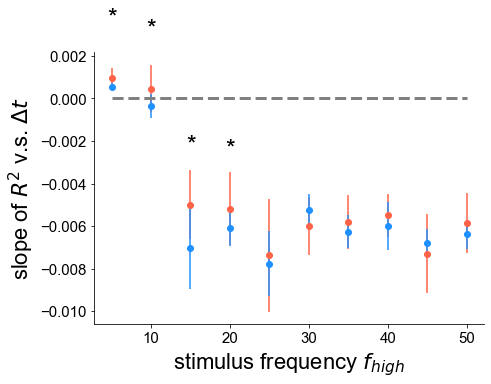

In [21]:
colors=['tomato','dodgerblue']
# stuff=np.zeros((numFreq,numNh,numDeltas,numSeeds))

fig,ax=plt.subplots(figsize=(7,5))

subnumNh=2  #only plotting nh=10 and nh=1000

for fi in range(numFreq):
    f=fvec[fi]
    slopes=np.zeros((subnumNh,numSeeds))
    sub_nhi=0
    for nhi in [0,2]: # only want nh=10 and nh=1000
        nh=nhvec[nhi]
        color=colors[sub_nhi]
        for seed in range(numSeeds):
            stuff_v_dt=stuff[fi,nhi,:,seed]
            slope,_=np.polyfit(deltatvec,stuff_v_dt,1)
            slopes[sub_nhi,seed]=slope
        means=np.mean(slopes[sub_nhi,:])
        sds=np.std(slopes[sub_nhi,:])
        plt.errorbar(f,means,sds,color=color,marker='o')
        sub_nhi+=1
    nh10_slopes=slopes[0,:]
    nh1k_slopes=slopes[1,:]
    stat,pval = ranksums(nh10_slopes,nh1k_slopes,'greater')
    if pval < 0.05:
        ax.text(f-0.55,np.mean(slopes[0,:])+0.0025,'*',fontsize=25)
ax.set_ylabel('slope of $R^2$ v.s. $\Delta t$')
ax.set_xlabel('stimulus frequency $f_{high}$')
# ax.set_ylim(-0.02,0.02)
ax.plot(fvec,np.zeros(numFreq),linestyle='--',color='gray',linewidth=3)
sns.despine()

plt.savefig(f'cleanPlots/r2{layer}Slope_v_freq_2Nhs_strong.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'cleanPlots/r2{layer}Slope_v_freq_2Nhs_strong.png',bbox_inches='tight',dpi=200)
plt.show()